# <div align="center">Preprocess Omedena Abuja ANPD Plate</div>

<p align="center">
Preprocess image of numpler plates detected by Omdena Abuja ANPD.
</p>

----

In [1]:
# import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt



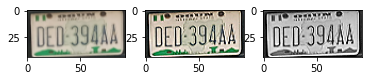

In [12]:
# read sample plate

image = cv2.imread('../inferences/plate.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
gray = cv2.cvtColor(sharp, cv2.COLOR_BGR2GRAY)

plt.subplot(131), plt.imshow(image)
plt.subplot(132), plt.imshow(sharp)
plt.subplot(133), plt.imshow(gray, 'gray')


plt.show()


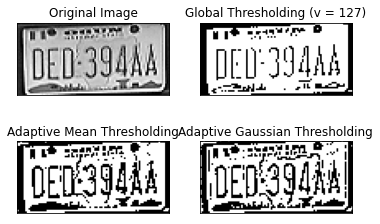

In [23]:
img = cv2.imread('../inferences/plate.jpg', 0)
# img = cv2.medianBlur(img, 1)
ret, th1 = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                           cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, 11, 2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [gray, th1, th2, th3]
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


## 1. Binarization

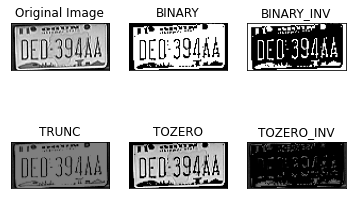

In [13]:
ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY',
          'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()


In [11]:
import easyocr


In [24]:

# this needs to run only once to load the model into memory
reader = easyocr.Reader(['en'], False, '../anpd/reader/',
                        '../anpd/reader/', detector=False, verbose=False)


In [38]:
result = reader.recognize(gray, detail=0)

print(result)


['ped 39444']


In [ ]:
import time
import easyocr
import cv2
import numpy as np


# this needs to run only once to load the model into memory
reader = easyocr.Reader(['en'], False, 'anpd/reader/',
                        detector=False, verbose=False)
charList = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ 1234567890'

image = cv2.imread('inferences/plate2.jpg')

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
gray = cv2.cvtColor(sharp, cv2.COLOR_BGR2GRAY)
tozero = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)[1]

start = time.time()

print("[INFO] reading plate(s)...")
result = reader.recognize(gray, detail=0, allowlist=charList)

end = time.time()
print("[INFO] ANPR took {:.6f} seconds".format(end - start))


print(result)

cv2.imshow('Original', image)
# cv2.imshow('Sharp', sharp)
cv2.imshow('Gray', gray)
# cv2.imshow('Tozero', tozero)


cv2.waitKey(0)


# Thanks!

[Abdulazeez Jimoh](https://www.linkedin.com/in/abdulazeez-oj)